# SPACESHIP TITANIC

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Titanic_df = pd.read_csv("dane.csv")

In [ ]:
Titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
Titanic_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
Titanic_df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [ ]:
Titanic_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
# Drop any row that contains a Null value
Titanic_df.dropna(how = 'any', inplace = True)
Titanic_df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [ ]:
# Split the "PassengerId" column into two columns using "_" as the delimiter
Titanic_df[['Group', 'GroupNumber']] = Titanic_df['PassengerId'].str.split('_', expand=True)

# Move the new columns to the desired position
group = Titanic_df.pop('Group')
Titanic_df.insert(1, 'Group', group)
group_number = Titanic_df.pop('GroupNumber')
Titanic_df.insert(2, 'GroupNumber', group_number)

Titanic_df.head(10)

,PassengerId,Group,GroupNumber,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,0001,01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,0002,01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,0003,01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,0003,02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,0004,01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,0005,01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,0006,01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
8,0007_01,0007,01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,0008,01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True
11,0008_03,0008,03,Europa,False,B/1/P,55 Cancri e,45.0,False,39.0,7295.0,589.0,110.0,124.0,Wezena Flatic,True


In [ ]:
Titanic_df['GroupNumber'].unique()

array(['01', '02', '03', '04', '06', '05', '07', '08'], dtype=object)

In [ ]:
# Remove leading '0' and convert the 'GroupNumber' column to integers from 1 to 8
Titanic_df['GroupNumber'] = Titanic_df['GroupNumber'].str.lstrip('0')
Titanic_df['GroupNumber'] = pd.to_numeric(Titanic_df['GroupNumber']).astype(int)

Titanic_df['GroupNumber'].unique()

array([1, 2, 3, 4, 6, 5, 7, 8])

In [ ]:
#Add the column to check if the passenger is in group or alone
Titanic_df['InGroup'] = Titanic_df['Group'].duplicated(keep=False)

in_group = Titanic_df.pop('InGroup')
Titanic_df.insert(2, 'InGroup', in_group)

Titanic_df.head(10)

,PassengerId,Group,InGroup,GroupNumber,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,0001,False,1,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,0002,False,1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,0003,True,1,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,0003,True,2,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,0004,False,1,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,0005,False,1,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,0006,False,1,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
8,0007_01,0007,False,1,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,0008,True,1,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True
11,0008_03,0008,True,3,Europa,False,B/1/P,55 Cancri e,45.0,False,39.0,7295.0,589.0,110.0,124.0,Wezena Flatic,True


In [ ]:
# Split the "cabin" column into three columns using "/" as the delimiter
Titanic_df[['Deck', 'Number', 'Side']] = Titanic_df['Cabin'].str.split('/', expand=True)
Titanic_df = Titanic_df.drop('Cabin', axis=1)

# Move the new columns to the desired position
deck = Titanic_df.pop('Deck')
Titanic_df.insert(7, 'Deck', deck)
number = Titanic_df.pop('Number')
Titanic_df.insert(8, 'Number', number)
side = Titanic_df.pop('Side')
Titanic_df.insert(9, 'Side', side)

# Drop the individual new columns if needed
#Titanic_df.drop(['Cabin'], axis=1, inplace=True)

Titanic_df.head(10)

,PassengerId,Group,InGroup,GroupNumber,HomePlanet,CryoSleep,Destination,Deck,Number,Side,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,0001,False,1,Europa,False,TRAPPIST-1e,B,0,P,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,0002,False,1,Earth,False,TRAPPIST-1e,F,0,S,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,0003,True,1,Europa,False,TRAPPIST-1e,A,0,S,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,0003,True,2,Europa,False,TRAPPIST-1e,A,0,S,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,0004,False,1,Earth,False,TRAPPIST-1e,F,1,S,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,0005,False,1,Earth,False,PSO J318.5-22,F,0,P,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,0006,False,1,Earth,False,TRAPPIST-1e,F,2,S,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
8,0007_01,0007,False,1,Earth,False,TRAPPIST-1e,F,3,S,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,0008,True,1,Europa,True,55 Cancri e,B,1,P,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True
11,0008_03,0008,True,3,Europa,False,55 Cancri e,B,1,P,45.0,False,39.0,7295.0,589.0,110.0,124.0,Wezena Flatic,True


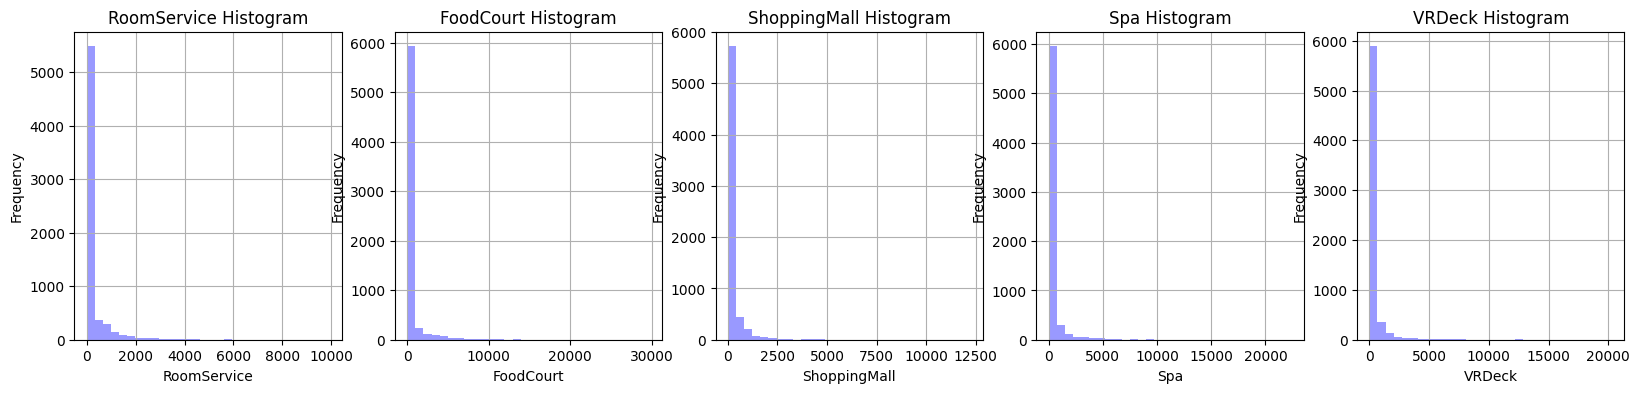

In [ ]:
import matplotlib.pyplot as plt

# Define the columns of interest
columns_of_interest = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Create subplots for each histogram
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

# Plot histograms for each column
for i, col in enumerate(columns_of_interest):
    ax = axes[i]
    ax.hist(Titanic_df[col], bins=30, alpha=0.4, color='b')
    ax.set_title(f'{col} Histogram')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid()

plt.show()

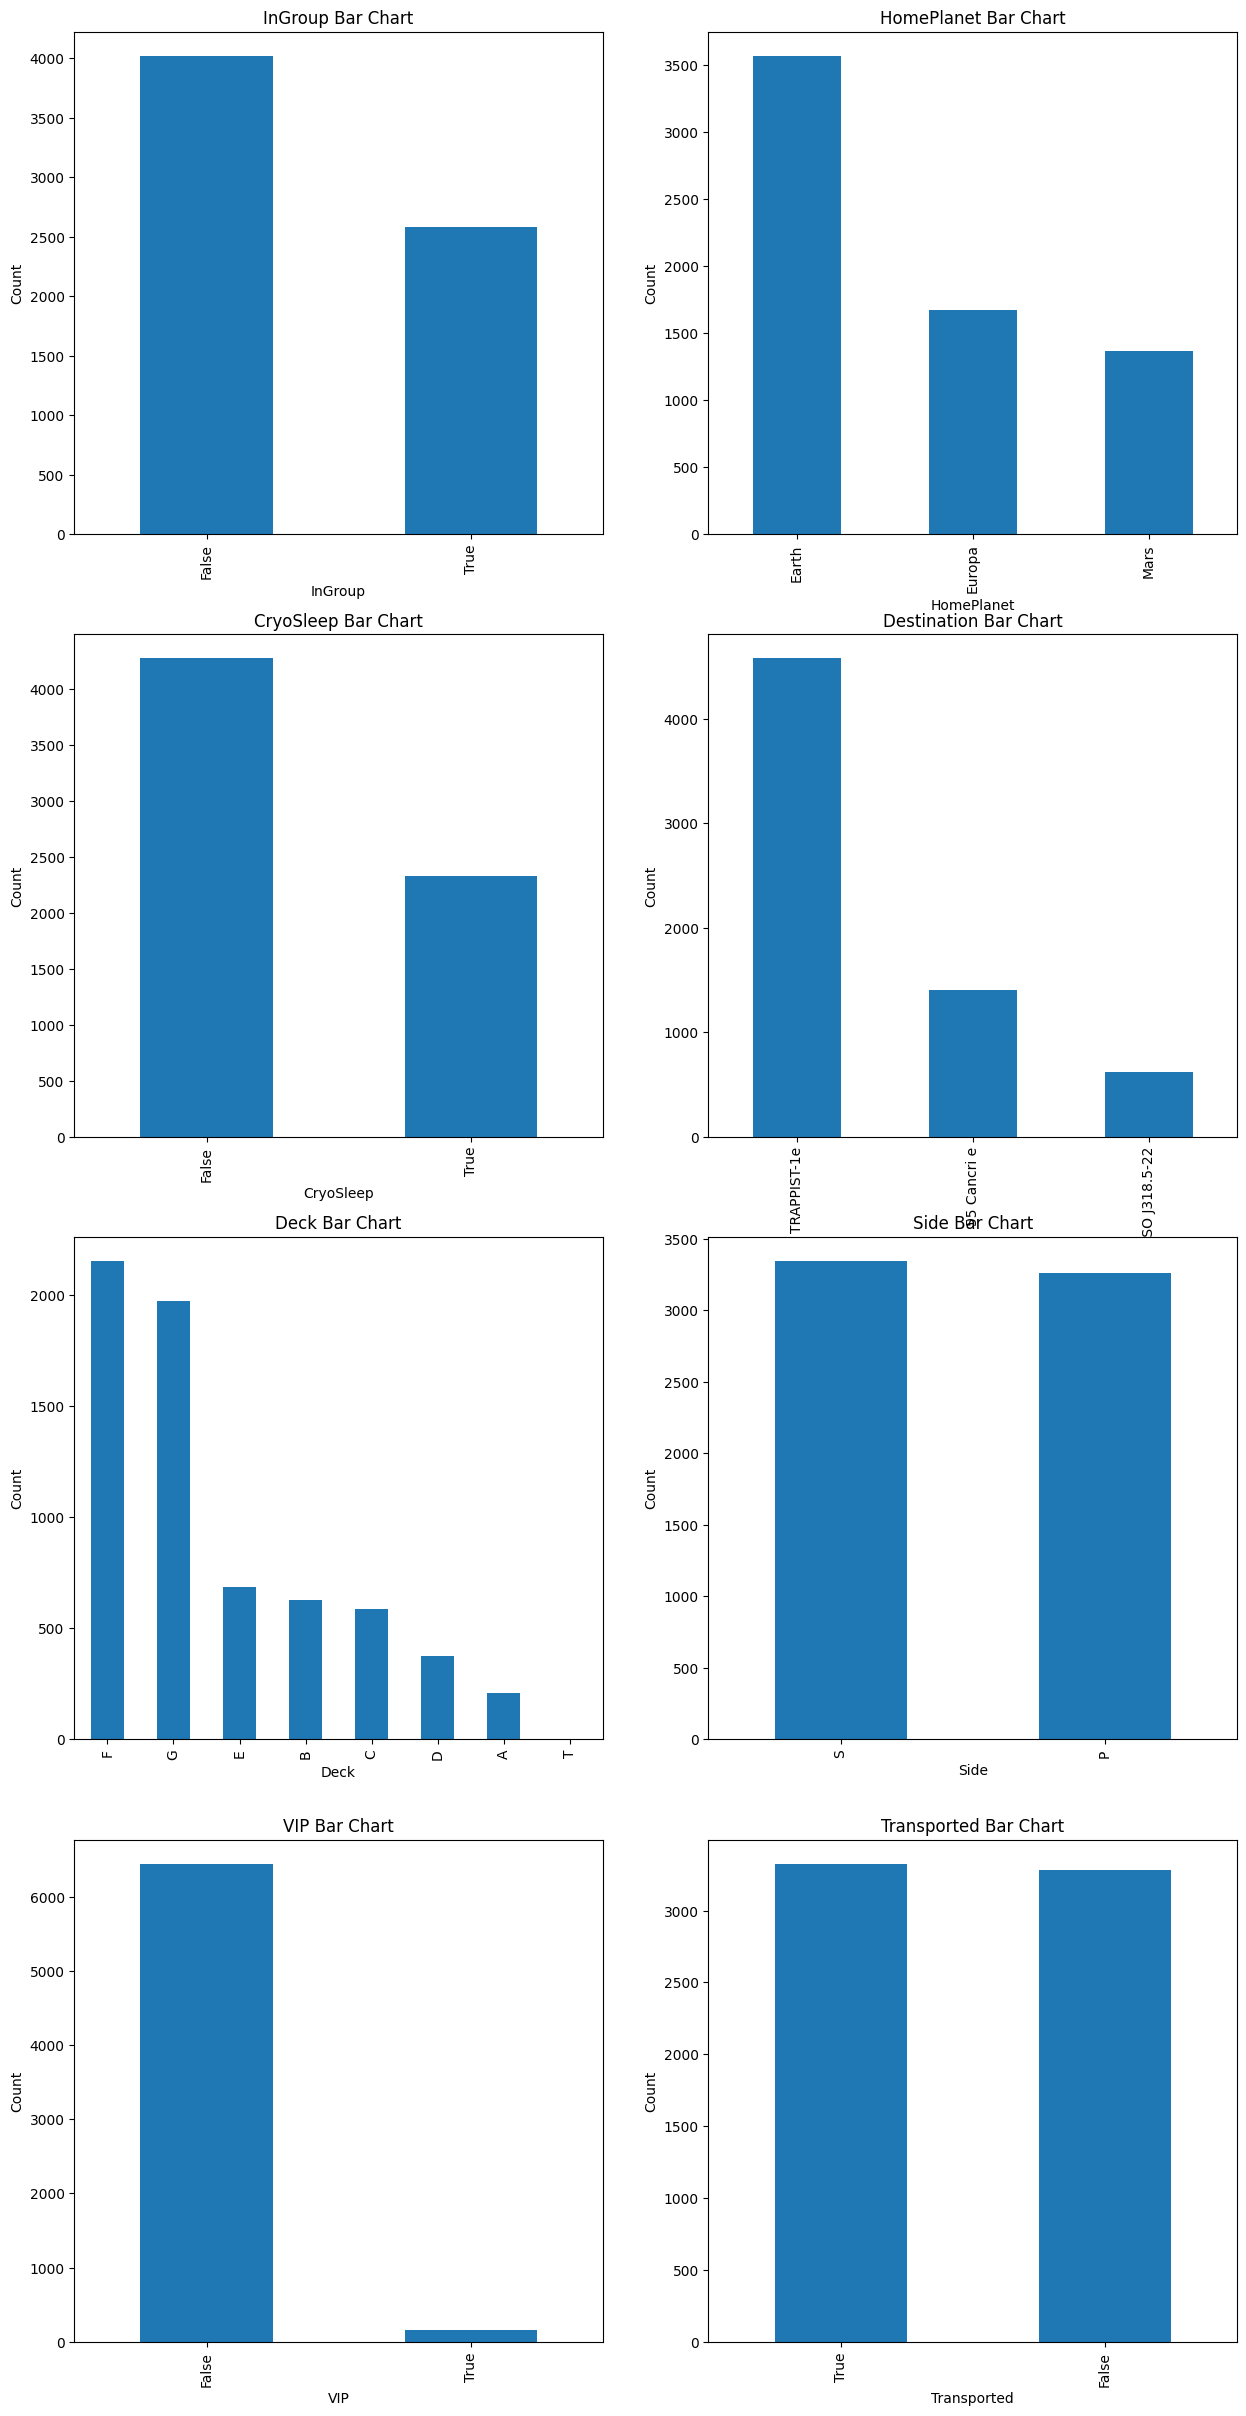

In [ ]:


# Plot a bar chart for 'InGroup'
plt.figure(figsize=(15, 30))

plt.subplot(4,2,1)
Titanic_df['InGroup'].value_counts().plot(kind='bar')
plt.title('InGroup Bar Chart')
plt.xlabel('InGroup')
plt.ylabel('Count')


plt.subplot(4,2,2)
Titanic_df['HomePlanet'].value_counts().plot(kind='bar')
plt.title('HomePlanet Bar Chart')
plt.xlabel('HomePlanet')
plt.ylabel('Count')

plt.subplot(4,2,3)
Titanic_df['CryoSleep'].value_counts().plot(kind='bar')
plt.title('CryoSleep Bar Chart')
plt.xlabel('CryoSleep')
plt.ylabel('Count')

plt.subplot(4,2,4)
Titanic_df['Destination'].value_counts().plot(kind='bar')
plt.title('Destination Bar Chart')
plt.xlabel('Destination')
plt.ylabel('Count')

plt.subplot(4,2,5)
Titanic_df['Deck'].value_counts().plot(kind='bar')
plt.title('Deck Bar Chart')
plt.xlabel('Deck')
plt.ylabel('Count')

plt.subplot(4,2,6)
Titanic_df['Side'].value_counts().plot(kind='bar')
plt.title('Side Bar Chart')
plt.xlabel('Side')
plt.ylabel('Count')

plt.subplot(4,2,7)
Titanic_df['VIP'].value_counts().plot(kind='bar')
plt.title('VIP Bar Chart')
plt.xlabel('VIP')
plt.ylabel('Count')

plt.subplot(4,2,8)
Titanic_df['Transported'].value_counts().plot(kind='bar')
plt.title('Transported Bar Chart')
plt.xlabel('Transported')
plt.ylabel('Count')

# Show the third bar chart
plt.show()

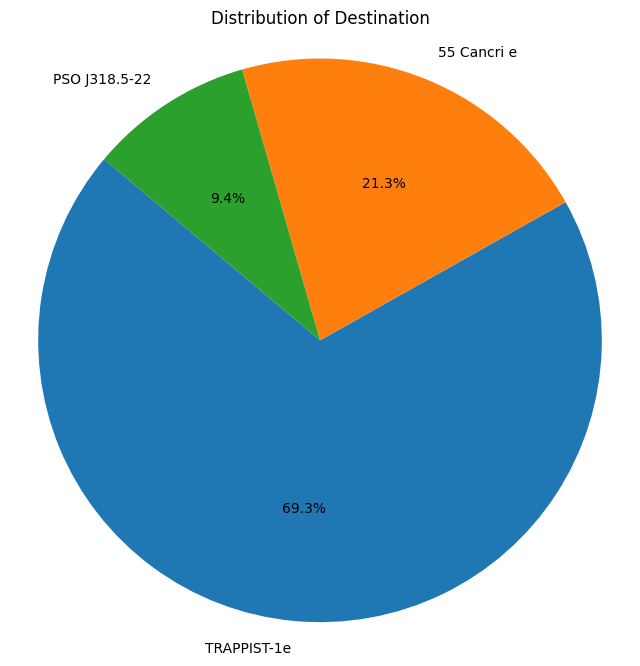

In [ ]:
planet_counts_destination = Titanic_df['Destination'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(planet_counts_destination, labels=planet_counts_destination.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Destination')
plt.axis('equal')

# Display the pie chart
plt.show()


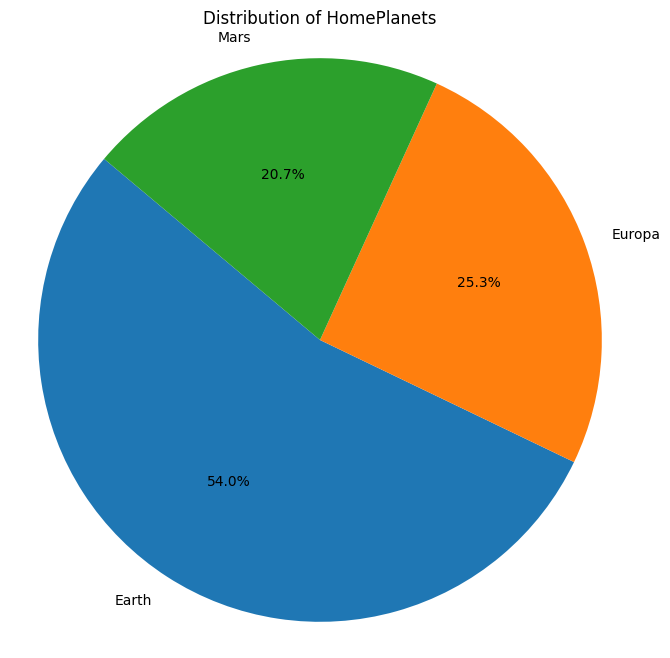

In [ ]:
# Count the occurrences of each unique value in the 'HomePlanet' column
homeplanet_counts = Titanic_df['HomePlanet'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(homeplanet_counts, labels=homeplanet_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of HomePlanets')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Display the pie chart
plt.show()

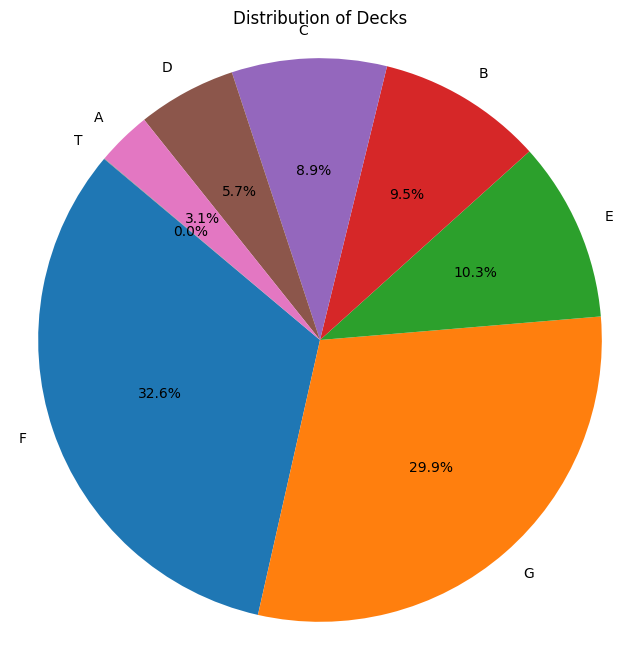

In [ ]:
# Count the occurrences of each unique value in the 'HomePlanet' column
deck_counts = Titanic_df['Deck'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(deck_counts, labels=deck_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Decks')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Display the pie chart
plt.show()

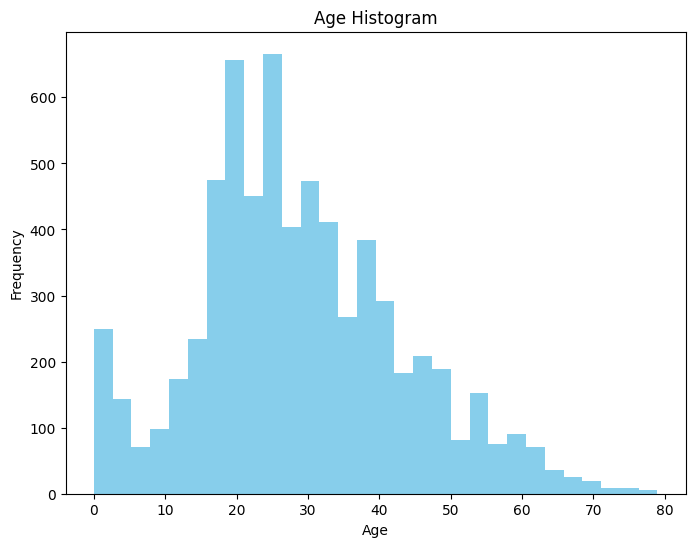

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(Titanic_df['Age'], bins=30, color='skyblue')
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
Titanic_df = pd.get_dummies(Titanic_df, columns=['HomePlanet'], prefix=['HomePlanet'])
Titanic_df = pd.get_dummies(Titanic_df, columns=['Destination'], prefix=['Destination'])
Titanic_df = pd.get_dummies(Titanic_df, columns=['Deck'], prefix=['Deck'])

Titanic_df.head(10)

,PassengerId,Group,InGroup,GroupNumber,CryoSleep,Number,Side,Age,VIP,RoomService,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,0001_01,0001,False,1,False,0,P,39.0,False,0.0,...,0,1,0,1,0,0,0,0,0,0
1,0002_01,0002,False,1,False,0,S,24.0,False,109.0,...,0,1,0,0,0,0,0,1,0,0
2,0003_01,0003,True,1,False,0,S,58.0,True,43.0,...,0,1,1,0,0,0,0,0,0,0
3,0003_02,0003,True,2,False,0,S,33.0,False,0.0,...,0,1,1,0,0,0,0,0,0,0
4,0004_01,0004,False,1,False,1,S,16.0,False,303.0,...,0,1,0,0,0,0,0,1,0,0
5,0005_01,0005,False,1,False,0,P,44.0,False,0.0,...,1,0,0,0,0,0,0,1,0,0
6,0006_01,0006,False,1,False,2,S,26.0,False,42.0,...,0,1,0,0,0,0,0,1,0,0
8,0007_01,0007,False,1,False,3,S,35.0,False,0.0,...,0,1,0,0,0,0,0,1,0,0
9,0008_01,0008,True,1,True,1,P,14.0,False,0.0,...,0,0,0,1,0,0,0,0,0,0
11,0008_03,0008,True,3,False,1,P,45.0,False,39.0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
Titanic_df['InGroup'] = Titanic_df['InGroup'].replace({True: 1, False: 0})
Titanic_df['CryoSleep'] = Titanic_df['CryoSleep'].replace({True: 1, False: 0})
Titanic_df['Transported'] = Titanic_df['Transported'].replace({True: 1, False: 0})
Titanic_df['VIP'] = Titanic_df['VIP'].replace({True: 1, False: 0})
Titanic_df['Side'] = Titanic_df['Side'].replace({'P': 1, 'S': 0})

Titanic_df = Titanic_df.drop('PassengerId', axis=1)
Titanic_df = Titanic_df.drop('Group', axis=1)
Titanic_df = Titanic_df.drop('Name', axis=1)

Titanic_df.head(10)

,InGroup,GroupNumber,CryoSleep,Number,Side,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,0,1,0,0,1,39.0,0,0.0,0.0,0.0,...,0,1,0,1,0,0,0,0,0,0
1,0,1,0,0,0,24.0,0,109.0,9.0,25.0,...,0,1,0,0,0,0,0,1,0,0
2,1,1,0,0,0,58.0,1,43.0,3576.0,0.0,...,0,1,1,0,0,0,0,0,0,0
3,1,2,0,0,0,33.0,0,0.0,1283.0,371.0,...,0,1,1,0,0,0,0,0,0,0
4,0,1,0,1,0,16.0,0,303.0,70.0,151.0,...,0,1,0,0,0,0,0,1,0,0
5,0,1,0,0,1,44.0,0,0.0,483.0,0.0,...,1,0,0,0,0,0,0,1,0,0
6,0,1,0,2,0,26.0,0,42.0,1539.0,3.0,...,0,1,0,0,0,0,0,1,0,0
8,0,1,0,3,0,35.0,0,0.0,785.0,17.0,...,0,1,0,0,0,0,0,1,0,0
9,1,1,1,1,1,14.0,0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
11,1,3,0,1,1,45.0,0,39.0,7295.0,589.0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
Titanic_df_without_column = Titanic_df.drop('Transported', axis=1)
column_to_move = Titanic_df['Transported']
Titanic_df = pd.concat([Titanic_df_without_column, column_to_move], axis=1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Reshape the columns because the scaler expects a 2D array
Titanic_df['GroupNumber'] = scaler.fit_transform(Titanic_df['GroupNumber'].values.reshape(-1, 1))
Titanic_df['Age'] = scaler.fit_transform(Titanic_df['Age'].values.reshape(-1, 1))
Titanic_df['Number'] = scaler.fit_transform(Titanic_df['Number'].values.reshape(-1, 1))
Titanic_df['RoomService'] = scaler.fit_transform(Titanic_df['RoomService'].values.reshape(-1, 1))
Titanic_df['FoodCourt'] = scaler.fit_transform(Titanic_df['FoodCourt'].values.reshape(-1, 1))
Titanic_df['ShoppingMall'] = scaler.fit_transform(Titanic_df['ShoppingMall'].values.reshape(-1, 1))
Titanic_df['Spa'] = scaler.fit_transform(Titanic_df['Spa'].values.reshape(-1, 1))
Titanic_df['VRDeck'] = scaler.fit_transform(Titanic_df['VRDeck'].values.reshape(-1, 1))

In [ ]:
Titanic_df.head(10)

,InGroup,GroupNumber,CryoSleep,Number,Side,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Destination_TRAPPIST-1e,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Transported
0,0,0.000000,0,0.000000,1,0.493671,0,0.000000,0.000000,0.000000,...,1,0,1,0,0,0,0,0,0,0
1,0,0.000000,0,0.000000,0,0.303797,0,0.010988,0.000302,0.002040,...,1,0,0,0,0,0,1,0,0,1
2,1,0.000000,0,0.000000,0,0.734177,1,0.004335,0.119948,0.000000,...,1,1,0,0,0,0,0,0,0,0
3,1,0.142857,0,0.000000,0,0.417722,0,0.000000,0.043035,0.030278,...,1,1,0,0,0,0,0,0,0,0
4,0,0.000000,0,0.000528,0,0.202532,0,0.030544,0.002348,0.012324,...,1,0,0,0,0,0,1,0,0,1
5,0,0.000000,0,0.000000,1,0.556962,0,0.000000,0.016201,0.000000,...,0,0,0,0,0,0,1,0,0,1
6,0,0.000000,0,0.001056,0,0.329114,0,0.004234,0.051622,0.000245,...,1,0,0,0,0,0,1,0,0,1
8,0,0.000000,0,0.001584,0,0.443038,0,0.000000,0.026331,0.001387,...,1,0,0,0,0,0,1,0,0,1
9,1,0.000000,1,0.000528,1,0.177215,0,0.000000,0.000000,0.000000,...,0,0,1,0,0,0,0,0,0,1
11,1,0.285714,0,0.000528,1,0.569620,0,0.003931,0.244692,0.048070,...,0,0,1,0,0,0,0,0,0,1


<Axes: >

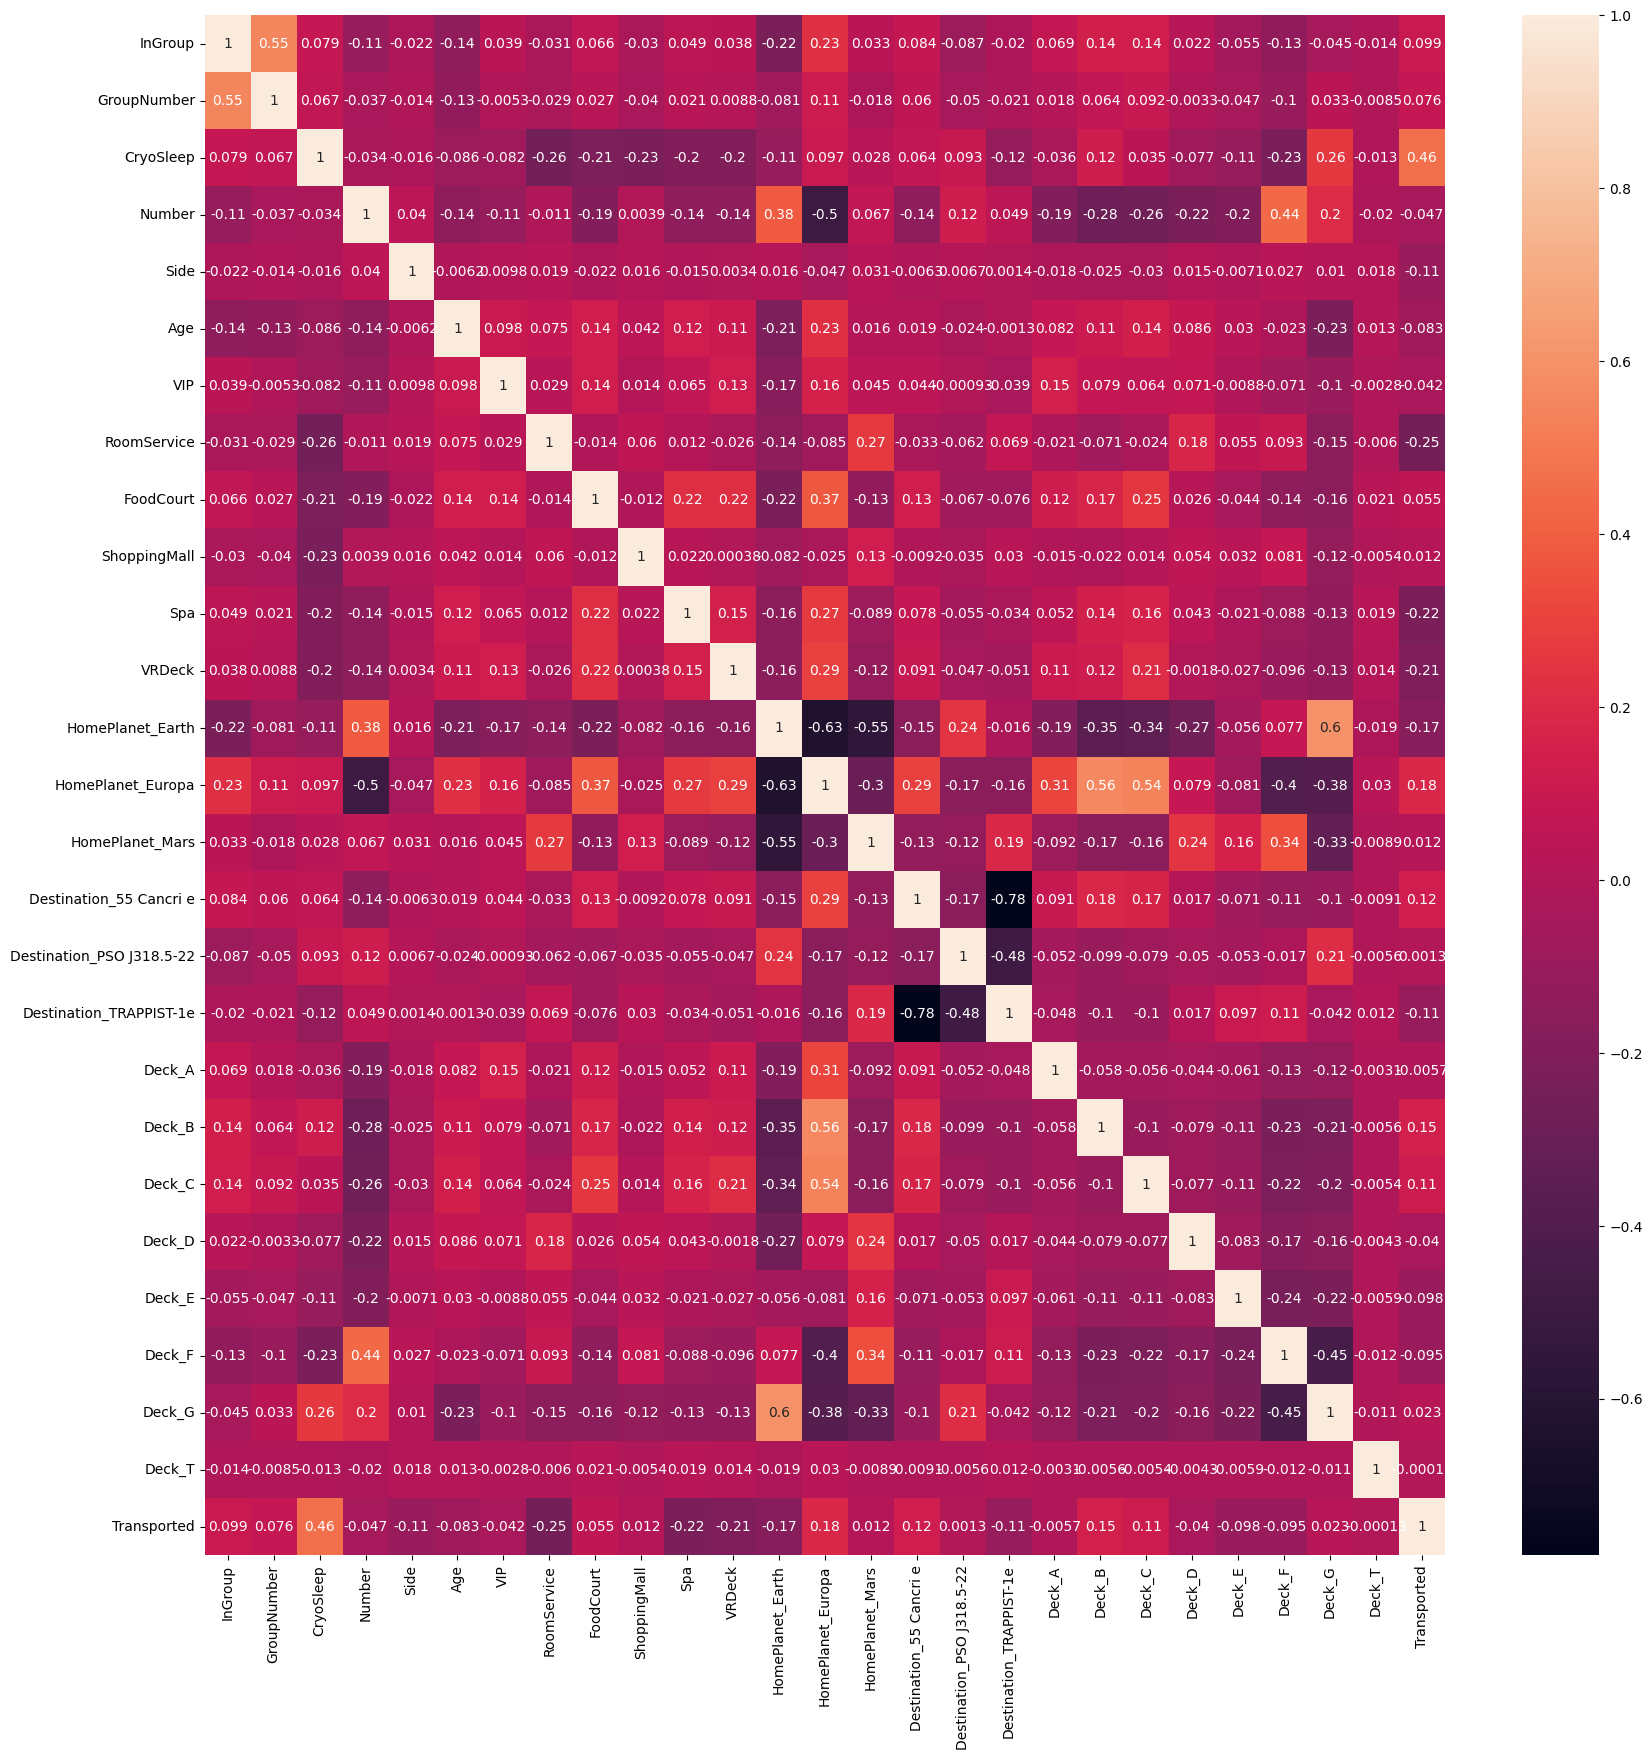

In [ ]:
correlations = Titanic_df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

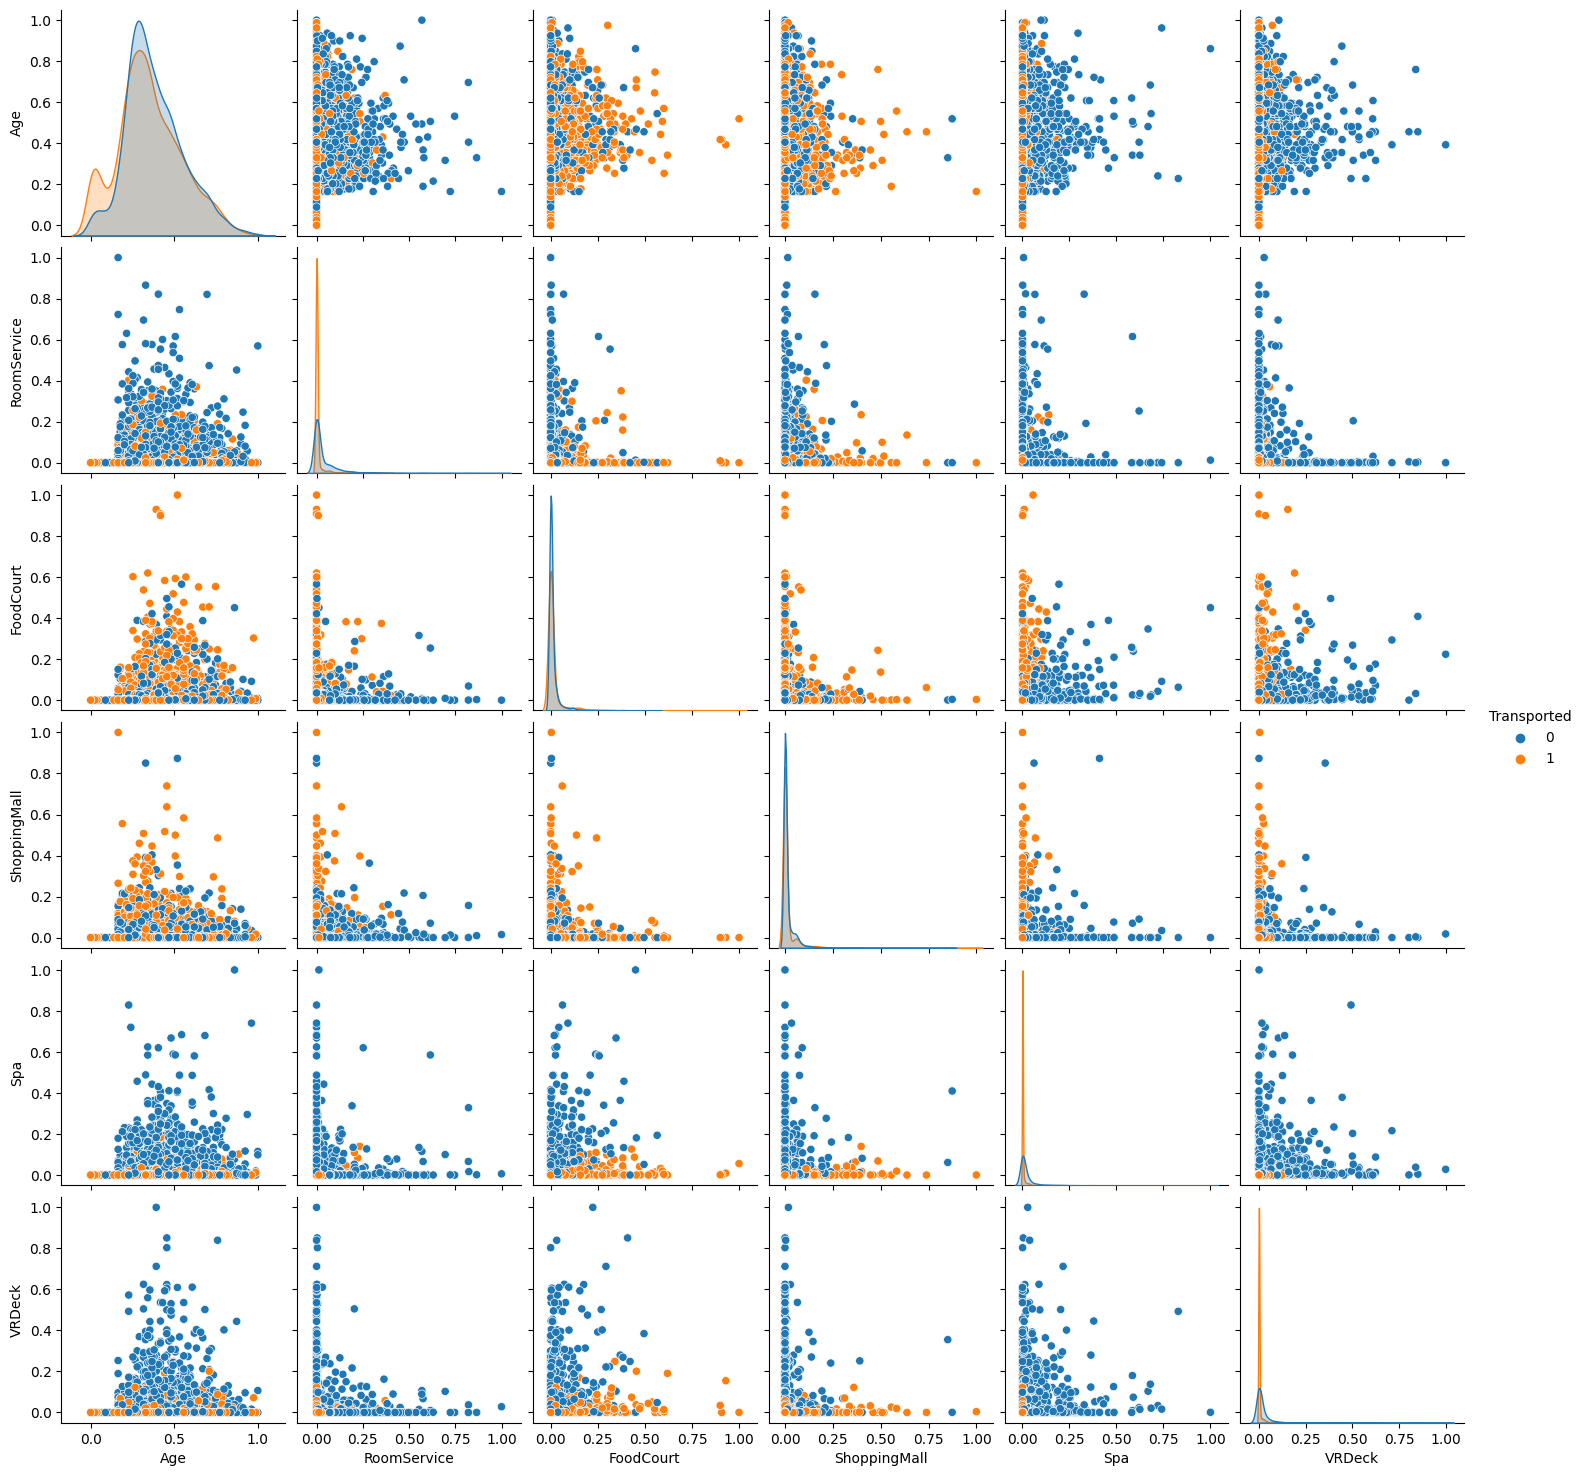

In [ ]:
sns.pairplot(Titanic_df, hue = 'Transported', vars = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'] )

In [ ]:
column_names = Titanic_df.columns.tolist()
print(column_names)

['InGroup', 'GroupNumber', 'CryoSleep', 'Number', 'Side', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Transported']


# Machine Learning Model

In [ ]:
import numpy as np

In [ ]:
X = Titanic_df.iloc[:, :-1].values
y = Titanic_df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[510 151]
 [133 528]]


0.7851739788199698

Kernel SVM model

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[518 143]
 [127 534]]


0.7957639939485628

K-Nearest Neighbors (K-NN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[523 138]
 [157 504]]


0.7768532526475038

Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[499 162]
 [120 541]]


0.7866868381240545

Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[554 107]
 [188 473]]


0.7768532526475038

Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[488 173]
 [155 506]]


0.7518910741301059